In [3]:
#1
import sqlite3
!sqlite3 -version

In [7]:
#2
!sqlite3 ./Data/InternetSpeed.db ".databases"

main: /home/jovyan/binder/./Data/InternetSpeed.db


In [8]:
#3
!pip install csvkit

     |████████████████████████████████| 3.8 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 191 kB 48.1 MB/s eta 0:00:01
     |████████████████████████████████| 153 kB 34.0 MB/s eta 0:00:01     |█████████████████████████████▉  | 143 kB 34.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 8.8 MB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 293 kB 46.7 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 243 kB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 9.0 MB/s  eta 0:00:01
  Created wheel for csvkit: filename=csvkit-1.0.5-py3-none-any.whl size=41628 sha256=52fe4e6f67331e8abaa15d418a7895e79a493111f861b65cde95091a4b3e65c7
  Stored in directory: /home/jovyan/.cache/pip/wheels/5a/4f/dc/dbc9146f887a3b90f4d937778dd1fd489f

In [10]:
#4
!test -e InternetSpeed.db && rm InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert ./Data/LA_wifi_speed_UK.csv

In [11]:
#5
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
#6
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [13]:
#7
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'
cur.execute(query)

In [14]:
#8
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [15]:
#9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)
for row in cur:
    print(row)

('2016-12-12 22:30:00.000000',)
('2016-11-30 12:00:00.000000',)
('2016-11-23 00:00:00.000000',)
('2016-12-02 22:30:00.000000',)
('2016-11-29 13:30:00.000000',)
('2016-12-05 15:00:00.000000',)
('2016-12-12 11:00:00.000000',)
('2016-12-06 08:30:00.000000',)
('2016-12-03 17:00:00.000000',)
('2016-11-27 23:00:00.000000',)


In [16]:
#10
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [17]:
#11
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [18]:
#12
columns = [member[0] for member in cur.description]
columns = columns[1:]

In [19]:
#13
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]
columns = list(set(columns))

In [20]:
#14
columns[:10]

['E06000040',
 'E07000105',
 'E08000003',
 'E06000006',
 'E07000033',
 'E07000095',
 'E08000033',
 'E07000026',
 'E07000008',
 'E07000192']

In [21]:
#15
area = columns[0]
print(area)

E06000040


In [22]:
#16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E06000040')

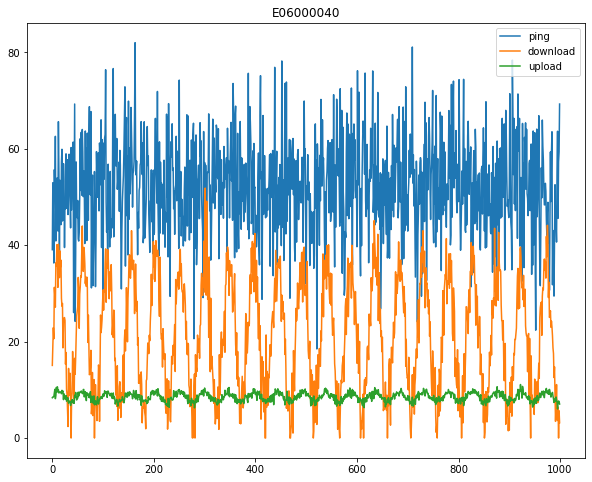

In [23]:
#17
area = columns[0]
plt.figure(figsize=(10, 8))

for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [24]:
#18
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

In [25]:
#19
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in  suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
df.head()

,Area,Average_p,Average_d,Average_u
0,E06000040,52.184297,21.330772,8.530594
1,E07000105,51.807182,21.145754,8.432119
2,E08000003,60.270760,24.750753,9.884330
3,E06000006,52.878090,21.238704,8.480249
4,E07000033,51.704411,20.855105,8.254385


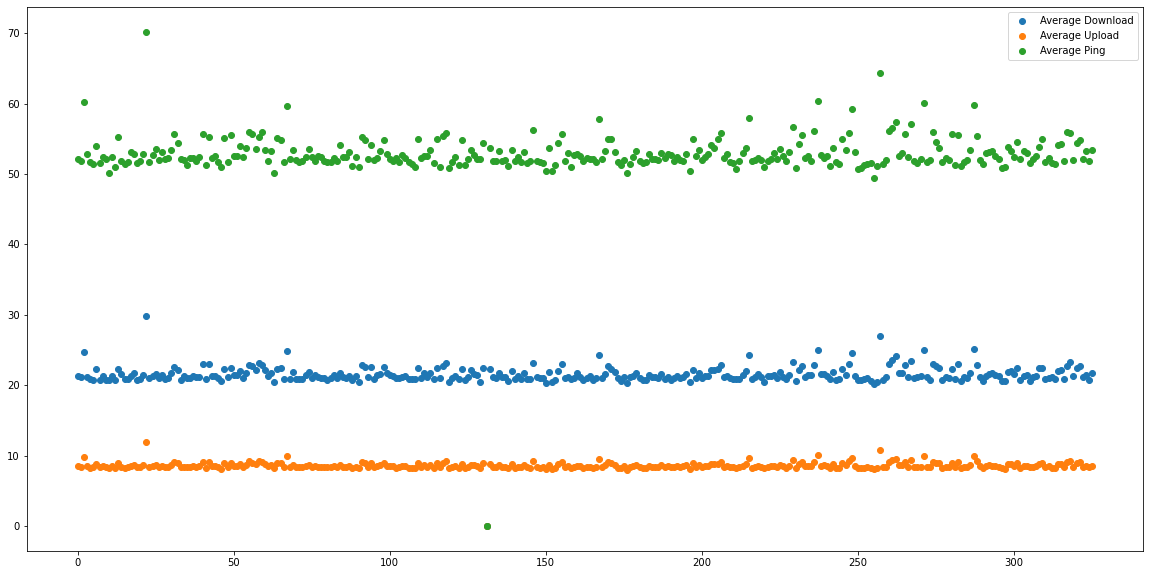

In [26]:
#20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d','Average_u','Average_p']], 'o')
plt.legend(['Average Download', 'Average Upload', 'Average Ping'])

In [27]:
#21
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

df.to_sql('average_speed', conn)

In [28]:
#22
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)
print(cur.fetchone())
print(cur.fetchone())

(0, 'E06000040', 52.18429669917182, 21.330772354125216, 8.530594261666172)
(1, 'E07000105', 51.80718221466102, 21.145754324646802, 8.432118849908598)


In [29]:
#23
conn.close()

In [30]:
#24
!csvsql --db sqlite:///InternetSpeed.db --insert ./Data/LA_population.csv

In [31]:
#25
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [32]:
#26
query = 'SELECT * FROM LA_population LIMIT 10'
cur.execute(query)

for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [33]:
#27
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'
cur.execute(query)
k=0
for row in cur:
    if k>10:
        break
    print(row)
    k+=1

(0, 'E06000040', 52.18429669917182, 21.330772354125216, 8.530594261666172, 'Windsor and Maidenhead', 'E06000040', 144560.0)
(1, 'E07000105', 51.80718221466102, 21.145754324646802, 8.432118849908598, 'Ashford', 'E07000105', 117956.0)
(2, 'E08000003', 60.27075956067445, 24.750753053178986, 9.884329623711908, 'Manchester', 'E08000003', 503127.0)
(3, 'E06000006', 52.87808994206384, 21.2387035397305, 8.480249236836627, 'Halton', 'E06000006', 125746.0)
(4, 'E07000033', 51.70441052345615, 20.85510494717965, 8.254385028719842, 'Bolsover', 'E07000033', 75866.0)
(5, 'E07000095', 51.49317005218246, 20.813795990097674, 8.344410048251747, 'Broxbourne', 'E07000095', 93609.0)
(6, 'E08000033', 53.98850070902167, 22.329473773302798, 8.771150162362698, 'Calderdale', 'E08000033', 203826.0)
(7, 'E07000026', 51.61883617167063, 20.81608038217937, 8.352399797326342, 'Allerdale', 'E07000026', 96422.0)
(8, 'E07000008', 52.434441612840175, 21.317241011471317, 8.476412907722873, 'Cambridge', 'E07000008', 123867.